# Running MTCNN

In [1]:
from mtcnn import MTCNN
import cv2
import os
import glob
from pathlib import Path
import re

for image in glob.glob('/home/mitho/Documents/ibtehaj/Deep3DFaceReconstruction/images/*'):
    name=Path(image).stem
    img = cv2.imread(image)
    cv2.imwrite("/home/mitho/Documents/ibtehaj/Deep3DFaceReconstruction/input/"+ name +".jpg",img)
    print(name)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    detector = MTCNN()
    detections = detector.detect_faces(img)
#     print(detections)
    my_file = open("/home/mitho/Documents/ibtehaj/Deep3DFaceReconstruction/input/"+ name +".txt","w+")
    for i in detections[0]["keypoints"]:
        s=str(detections[0]["keypoints"][i])
        s= re.sub(r"[\([{}),\]]", "", s)
        my_file.write(s + "\n")

/home/mitho/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/mitho/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/mitho/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/mitho/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:529: Futu

3
Instructions for updating:
Colocations handled automatically by placer.
[{'box': [169, 169, 488, 680], 'confidence': 0.9999645948410034, 'keypoints': {'left_eye': (299, 445), 'right_eye': (539, 457), 'nose': (413, 583), 'mouth_left': (316, 699), 'mouth_right': (505, 704)}}]
1
[{'box': [93, 23, 322, 426], 'confidence': 0.9999817609786987, 'keypoints': {'left_eye': (188, 198), 'right_eye': (343, 209), 'nose': (261, 295), 'mouth_left': (187, 346), 'mouth_right': (320, 356)}}]
2
[{'box': [77, 32, 332, 419], 'confidence': 0.9991859793663025, 'keypoints': {'left_eye': (168, 224), 'right_eye': (299, 181), 'nose': (247, 299), 'mouth_left': (226, 371), 'mouth_right': (333, 339)}}]


Filtering detections with confidence greater than the confidence threshold and plotting detections

(-0.5, 511.5, 511.5, -0.5)

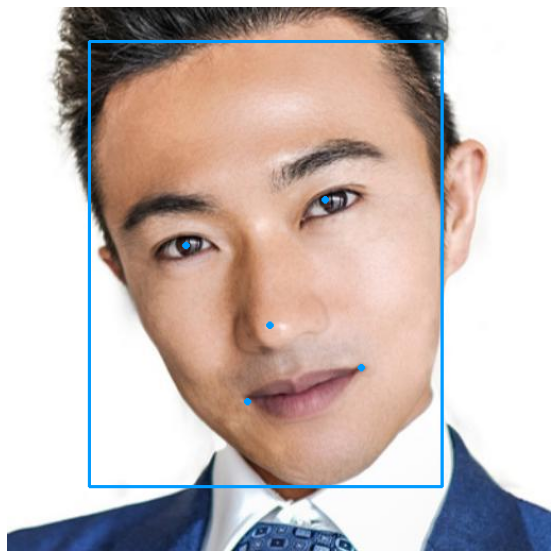

In [2]:
import matplotlib.pyplot as plt

img_with_dets = img.copy()
min_conf = 0.9
for det in detections:
    if det['confidence'] >= min_conf:
        x, y, width, height = det['box']
        keypoints = det['keypoints']
        cv2.rectangle(img_with_dets, (x,y), (x+width,y+height), (0,155,255), 2)
        cv2.circle(img_with_dets, (keypoints['left_eye']), 2, (0,155,255), 2)
        cv2.circle(img_with_dets, (keypoints['right_eye']), 2, (0,155,255), 2)
        cv2.circle(img_with_dets, (keypoints['nose']), 2, (0,155,255), 2)
        cv2.circle(img_with_dets, (keypoints['mouth_left']), 2, (0,155,255), 2)
        cv2.circle(img_with_dets, (keypoints['mouth_right']), 2, (0,155,255), 2)
plt.figure(figsize = (10,10))
plt.imshow(img_with_dets)
plt.axis('off')